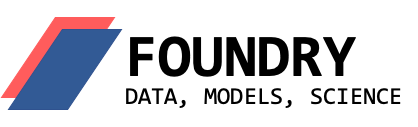

# Foundry Model Publication Tutorial for Beginners
This introduction uses Foundry to:

1.   Describe a Scikit-Learn model using the correct metadata
2.   Publish the model to Foundry


This notebook is set up to run as a [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=5fCEDCU_qrC0) notebook, which allows you to run python code in the browser, or as a [Jupyter](https://jupyter.org/) notebook, which runs locally on your machine.

The code in the next cell will detect your environment to make sure that only cells that match your environment will run.

In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# Installing Foundry
First we'll need to install Foundry and [MDF](https://materialsdatafacility.org/). If you're running the notebook locally, just make sure that Foundry is installed in your local environment. If you're using Google Colab, run the code below to install.

In [2]:
if IN_COLAB:
  !pip install --upgrade foundry_ml

Requirement already up-to-date: foundry_ml in /usr/local/lib/python3.7/dist-packages (0.0.11)
     |████████████████████████████████| 552kB 2.9MB/s 
ERROR: dlhub-sdk 0.9.4 has requirement requests>=2.24.0, but you'll have requests 2.23.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:
      Successfully uninstalled docutils-0.17.1


# Importing and Instantiating Foundry
Now we can import Foundry!

In [3]:
from foundry import Foundry

We'll also need to instantiate it. To do so, you'll need a [Globus](https://www.globus.org) account. Once you have your account, you can instantiate Foundry using the code below. When you instantiate Foundry locally, be sure to have your Globus endpoint turned on (you can do that with [Globus Connect Personal](https://www.globus.org/globus-connect-personal)). When you instantiate Foundry on Google Colab, you'll be given a link in the cell's output and asked to enter the provided auth code (this should happen twice).

In [4]:
if IN_COLAB:
  f = Foundry(no_local_server=True, no_browser=True) #instantiating in colab
else:
  f = Foundry() #instantiating locally

Please paste the following URL in a browser:
https://auth.globus.org/v2/oauth2/authorize?client_id=984464e2-90ab-433d-8145-ac0215d26c8e&redirect_uri=https%3A%2F%2Fauth.globus.org%2Fv2%2Fweb%2Fauth-code&scope=urn%3Aglobus%3Aauth%3Ascope%3Adata.materialsdatafacility.org%3Aall+https%3A%2F%2Fauth.globus.org%2Fscopes%2Fc17f27bb-f200-486a-b785-2a25e82af505%2Fconnect+urn%3Aglobus%3Aauth%3Ascope%3Asearch.api.globus.org%3Asearch+https%3A%2F%2Fauth.globus.org%2Fscopes%2F56ceac29-e98a-440a-a594-b41e7a084b62%2Fall+urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+https%3A%2F%2Fauth.globus.org%2Fscopes%2F81fc4156-a623-47f2-93ad-7184118226ba%2Fauth+openid+https%3A%2F%2Fauth.globus.org%2Fscopes%2Ffacd7ccc-c5f4-42aa-916b-a0e270e2c2a9%2Fall&state=_default&response_type=code&code_challenge=YqtVgFUT9bBXyoAT9pV6NhN4Flg328HN9sWMvH54maA&code_challenge_method=S256&access_type=offline&prefill_named_grant=Foundry+Login
Please Paste your Auth Code Below: 
hHKKMSkk8UGDqNdAdXl4XiyxoAVmUL
Please paste th

Before publishing, you need join the correct Globus groups so that you have the permissions to publish to Foundry! [Join this group](https://app.globus.org/groups/cc192dca-3751-11e8-90c1-0a7c735d220a/about) and [this group](https://app.globus.org/groups/42a7a77c-4789-11ea-95b7-0ef992ed7ca1/about) to get started. Follow the 
prompts to get set up.

# Loading Data and Training our Model
Here we'll be training an SVM classifier from Scikit-Learn on the iris dataset. 

First, let's load the iris data from Foundry!

In [5]:
if IN_COLAB:
  f = f.load("_test_blaiszik_foundry_iris_v2.1", globus=False) #loading data in colab
else:
  f = f.load("_test_blaiszik_foundry_iris_v2.1") #loading data locally

Loading by source_id
Done curling.
[{'/foundry/_test_blaiszik_foundry_iris_v2.1/foundry_dataframe.json status': True}]


In [6]:
X,y = f.load_data()

Now that we've loaded the data, let's take a peek!

In [7]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


And the classes of interest:

In [8]:
# 0 - 2 represent the different iris species, setosa, versicolor, and virginica
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [9]:
import numpy as np

# need to flatten to shape (n_cols, ) for sklearn
y_flat = y['y'].ravel()
y_flat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


Now that the data are loaded, we can train our model.

In [10]:
print('Loaded {} rows with {} columns:'.format(len(X), len(X.columns)),
      X.columns)
from sklearn.svm import SVC

# Fit the model
model = SVC(kernel='linear', C=1, probability=True)
model.fit(X, y_flat)
print('Trained a SVC model')

model

Loaded 150 rows with 4 columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
Trained a SVC model


SVC(C=1, kernel='linear', probability=True)

In [11]:
import pickle as pkl

# Save the model using pickle
with open('model.pkl', 'wb') as fp:
    pkl.dump(model, fp)
print('Saved model to disk')

Saved model to disk


# Describing our Model

In Foundry, you can publish models or Python functions, which we call `servables`. For each `servable`, we need to create the appropriate metadata to tell Foundry what our servable is all about!

Here we're going to use a Scikit-Learn model. 

A few key terms are required for the metadata, here is the general format for a Scikit-Learn `servable`: 

```
{
    "title": <the full title of the model to be published>,
    "short_name": <the shorthand name for the model, i.e. what someone
        uses to download your model>,
    "authors": <list of author names>,
    "servable": {
        "type": "sklearn",
        "filepath": <full path to saved model>,
        "classes": <names of classes of interest>,
        "n_input_columns": <number of training features>
    }
}
```

Other servable types include Keras, Tensorflow 1 & 2, PyTorch, and Python functions. These servables have slightly different options -- you can currently read more about them in the [Data and Learning Hub documentation](https://dlhub-sdk.readthedocs.io/en/latest/servable-types.html) (which Foundry builds upon). 

Now that we have an idea of what the metadata look like, let's create the metadata for our iris model.

In [12]:
# the names of the iris species in question
class_names = ['setosa', 'versicolor', 'virginica']
# the number of input columns, i.e. features
n_columns = len(X.columns)

# set model options
options_sklearn = {
            "title": "Iris SVM (test publication)",
            "short_name": "everybody_iris_test_svm,",
            "authors": ["Everybody, M"],
            "servable": {
                "type": "sklearn",
                "filepath": "model.pkl",
                "classes": class_names,
                "n_input_columns": n_columns
            }
}

# Publishing and Running Our Model

Now that we have our metadata, we can publish our model on Foundry! Foundry publishes the model to the Data and Learning Hub ([DLHub](https://www.dlhub.org/)), where we can easily search for and run our models.  

In [13]:
# publish our model to Foundry! that's it!
f.publish_model(options_sklearn)

DLHub schema successfully validated


'482bbe72-38f7-43c1-9ce7-71c703b807b5'

Let's look for our model in DLHub (give it a minute or two to finish publication for checking). 

Go [here](https://petreldata.alcf.anl.gov/dlhub/?q=*) to search for your model in DLHub by name or author.

We can find our model when we search by the author name "Everybody"

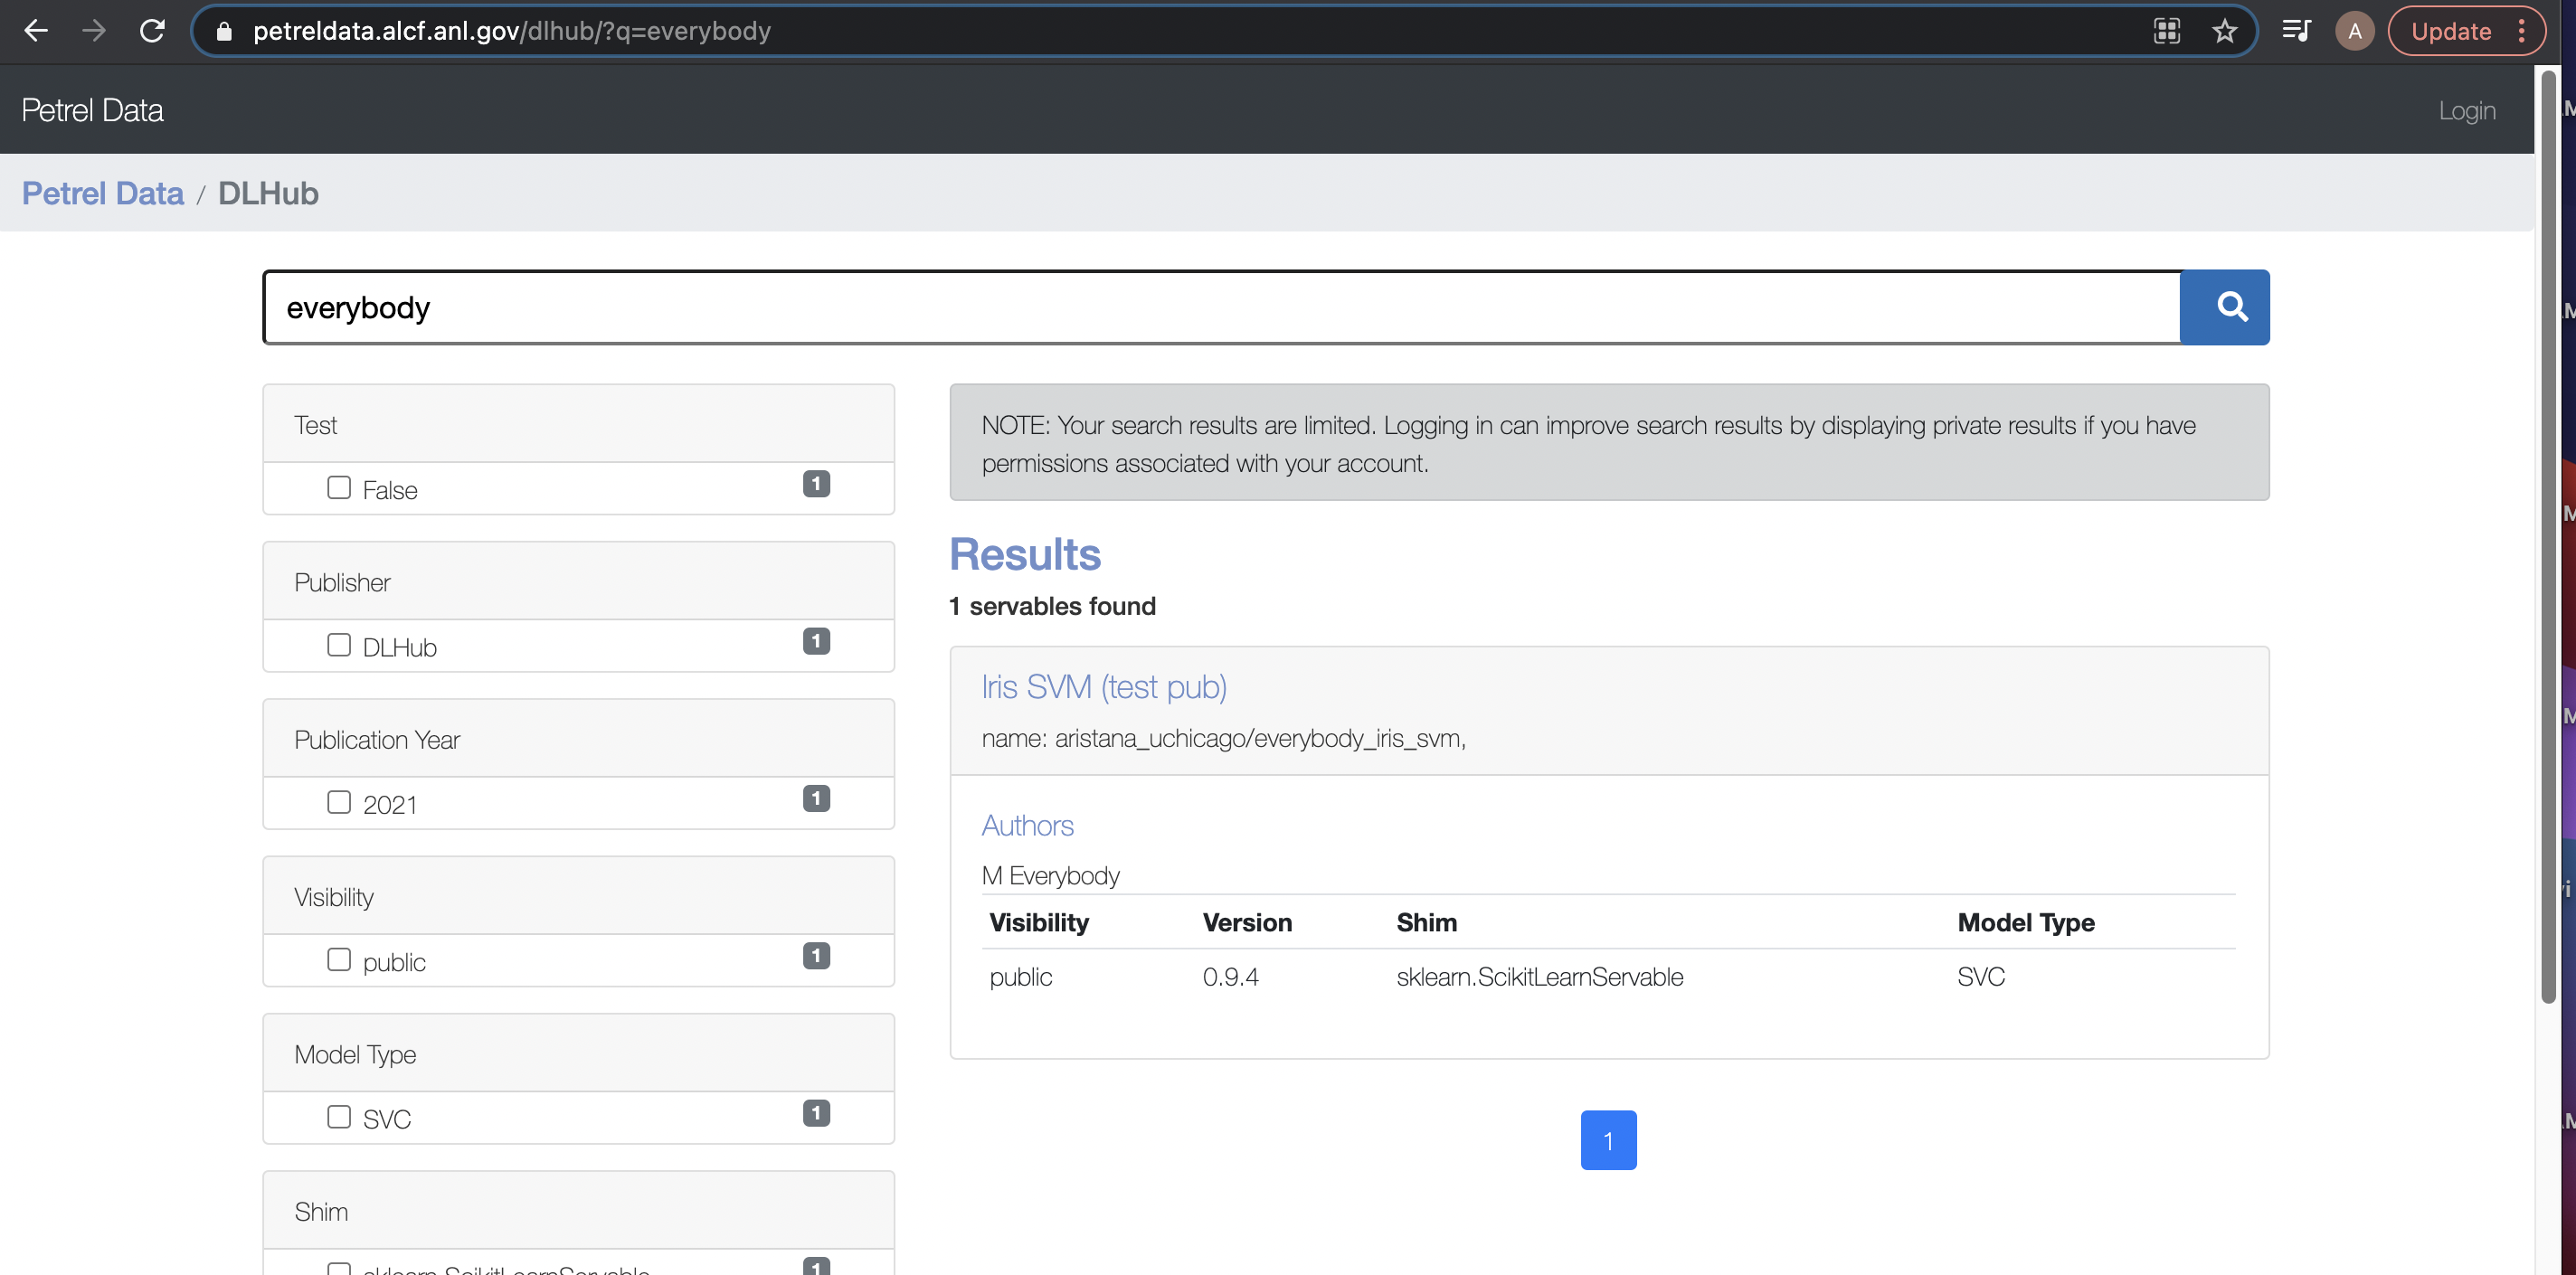

Congrats, you've published a model to Foundry! To run the model in the cloud, simply specify the model by its user and name

In [17]:
# create toy test data to run the model on
test_data = [[6.7,3.1,4.4,1.4], [4.8,3.0,1.4,0.1], [7.2,3.6,6.1,2.5]]
pred = f.run("aristana_uchicago/everybody_iris_test_svm", test_data)

# view the predictions
pred

array([[0.00573928, 0.98610419, 0.00815653],
       [0.96567464, 0.02411908, 0.01020628],
       [0.00273817, 0.00128682, 0.99597501]])